# Artificial Neural Networks and Deep Learning---## Homework 1: Minimal Working ExampleTo make your first submission, follow these steps:1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.2. Upload the `training_set.npz` file to this folder.3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.4. Load and process the data.5. Implement and train your model.6. Submit the generated `.zip` file to Codabench.

## 📙 SET THE NAME

In [1]:
name = "ConvNeXtBase"
prepare_submission = True

## ⚙️ Import Libraries

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow import keras as tfk
from tensorflow.keras import mixed_precision

from tensorflow.keras.mixed_precision import LossScaleOptimizer
mixed_precision.set_global_policy('mixed_float16')

from tensorflow.keras import layers as tfkl
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy

import keras_cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
seed = 777
np.random.seed(777)
tf.random.set_seed(777)

## ⏳ Load the Data

In [4]:
data = np.load("/kaggle/input/hbntlualk-khahzla/augmented_dataset.npz")

In [5]:
X = data['X']
y = data['y']

In [6]:
# Shuffle the data before splitting
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.10,
    random_state=seed,
    stratify=y
)

# Print the shapes of the resulting sets
print('Training set shape:\t', X_train.shape, y_train.shape)
print('Validation set shape:\t', X_val.shape, y_val.shape)

Training set shape:	 (43023, 96, 96, 3) (43023, 8)
Validation set shape:	 (4781, 96, 96, 3) (4781, 8)


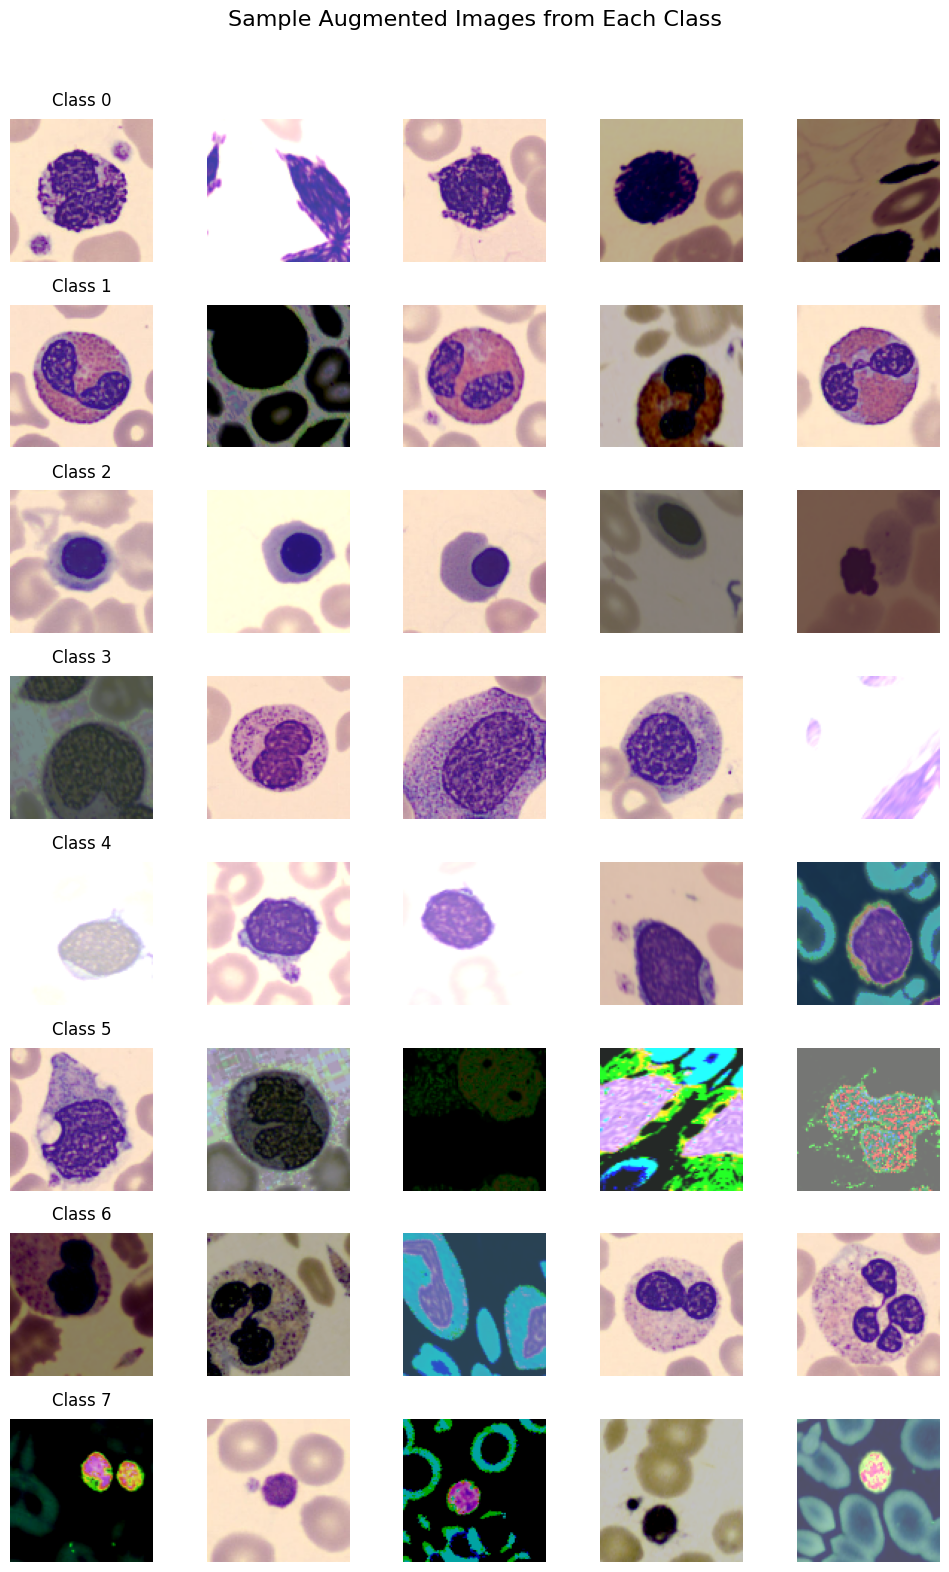

In [7]:
# Number of samples to display per class
samples_per_class = 5
unique_classes = range(y_train.shape[1])  # Assuming classes are labeled from 0 to n-1

# Adjust figure size and remove extra spacing between plots
fig, axes = plt.subplots(
    len(unique_classes), 
    samples_per_class, 
    figsize=(samples_per_class * 2, len(unique_classes) * 2)
)
fig.suptitle("Sample Augmented Images from Each Class", fontsize=16)

for class_idx in unique_classes:
    # Find indices of samples for this class
    class_indices = np.where(np.argmax(y_train, axis=1) == class_idx)[0]
    
    # Randomly select images from this class
    selected_indices = np.random.choice(class_indices, samples_per_class, replace=False)
    
    for i, idx in enumerate(selected_indices):
        ax = axes[class_idx, i]
        ax.imshow(X_train[idx].astype("uint8"))  # Convert to uint8 if needed for display
        ax.axis("off")
        if i == 0:
            ax.set_title(f"Class {class_idx}", fontsize=12, pad=10)  # Add padding to title

# Adjust layout to reduce spacing
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Data augmentation

See class distribution without data augmentation...

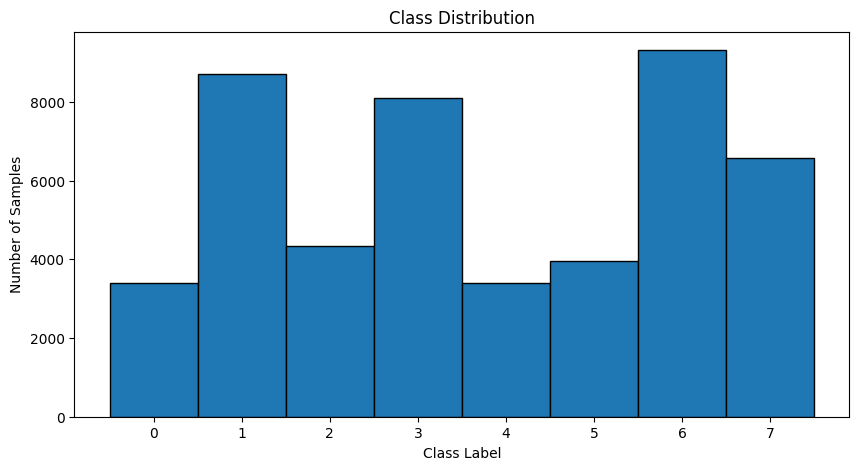

In [8]:
class_labels = np.argmax(y, axis=-1)

# Set up the plot
plt.figure(figsize=(10, 5))

# Plot the histogram
plt.hist(class_labels, bins=np.arange(class_labels.max() + 2) - 0.5, edgecolor='black')

# Label the axes and title
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')

# Set x-axis ticks to represent class labels
plt.xticks(np.arange(class_labels.max() + 1))

# Display the plot
plt.show()

## 🧮 Define Network Parameters

In [9]:
# Input shape for the model
input_shape = X_train.shape[1:]

# Output shape for the model
# Assuming the number of classes is 8
output_shape = 8

# Print the shapes
print("Input Shape:", input_shape)
print("Output Shape:", output_shape)

Input Shape: (96, 96, 3)
Output Shape: 8


In [10]:
# Number of training epochs & Batch Size
epochs = 1000
batch_size = 128

# Learning rate: step size for updating the model's weights
learning_rate = 1e-4

# Print the defined parameters
print("Epochs:", epochs)
print("Batch Size:", batch_size)
print("Learning Rate:", learning_rate)

Epochs: 1000
Batch Size: 128
Learning Rate: 0.0001


## 🛠️ Train and Save the Model

In [11]:
from tensorflow.keras.applications import ConvNeXtBase

# Define the base model
base_model = ConvNeXtBase(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=input_shape,  # Use your defined `input_shape`
    pooling="avg"  # Global average pooling after the feature extractor
)

# Add custom layers
x = base_model.output
x = Dense(256, activation="relu")(x)  # Dense layer with 256 units and ReLU activation
output = Dense(8, activation="softmax")(x)  # Final output layer for 8 classes

# Define the complete model
model = Model(inputs=base_model.input, outputs=output)

# Print a summary of the model (optional)
model.summary()

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_pres… │ (None, 96, 96, 3) │          0 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stem  │ (None, 24, 24,    │      6,528 │ convnext_base_pr… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │      6,400 │ convnext_base_st… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        128 │ convnext_base_st… │
│ (LayerScale)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │          0 │ convnext_base_st… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 24,    │          0 │ convnext_base_st… │
│                     │ 128)              │            │ convnext_base_st… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │      6,400 │ add[0][0]         │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        256 │ convnext_base_st… │
│ (LayerNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     66,048 │ convnext_base_st… │
│ (Dense)             │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │          0 │ convnext_base_st… │
│ (Activation)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │     65,664 │ convnext_base_st… │
│ (Dense)             │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ convnext_base_stag… │ (None, 24, 24,    │        128 │ convnext_base_st

 Total params: 87,830,920 (335.05 MB)

 Trainable params: 87,830,920 (335.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model

# Define the loss function, optimizer, and metrics
loss = CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Nadam(learning_rate)
optimizer = LossScaleOptimizer(optimizer)  # For mixed-precision training (if applicable)
metrics = ['accuracy']

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# Print confirmation
print("Model compiled successfully!")

Model compiled successfully!


## 🧠 Train the Model

In [13]:
# Create an EarlyStopping callback
early_stopping = tfk.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=7,  # Number of epochs with no improvement to wait
    restore_best_weights=True  # Restore weights from the best epoch
)

# Create a ReduceLROnPlateau callback
reduce_lr_on_plateau = tfk.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    mode='max',
    factor=0.5,  # Factor to reduce the learning rate
    patience=2,  # Number of epochs with no improvement to wait
    min_lr=1.25e-5  # Minimum learning rate
)

# Store the callbacks in a list
callbacks = [early_stopping, reduce_lr_on_plateau]

# Print confirmation
print("Callbacks created successfully!")

Callbacks created successfully!


In [14]:
# Train the model with the EarlyStopping and ReduceLROnPlateau callbacks
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=callbacks
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

Epoch 1/1000


I0000 00:00:1732217110.357966      67 service.cc:145] XLA service 0x7cbb300037f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732217110.358034      67 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1732217169.165816      67 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_211', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1732217169.257839      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


336/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7984 - loss: 0.6039

I0000 00:00:1732217581.623725      67 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_200', 8 bytes spill stores, 8 bytes spill loads



337/337 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.7989 - loss: 0.6022 - val_accuracy: 0.9264 - val_loss: 0.1970 - learning_rate: 1.0000e-04
Epoch 2/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9621 - loss: 0.1078 - val_accuracy: 0.9479 - val_loss: 0.1523 - learning_rate: 1.0000e-04
Epoch 3/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9861 - loss: 0.0412 - val_accuracy: 0.9454 - val_loss: 0.1820 - learning_rate: 1.0000e-04
Epoch 4/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.9891 - loss: 0.0318 - val_accuracy: 0.9373 - val_loss: 0.2310 - learning_rate: 1.0000e-04
Epoch 5/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9921 - loss: 0.0203 - val_accuracy: 0.9481 - val_loss: 0.2149 - learning_rate: 5.0000e-05
Epoch 6/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.9960 - loss: 0.0112 - val_accuracy: 0.9544 - val_loss: 0.1701 - learning_rate: 5.0000e-05
Epoch 7/1000
337/337 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - ac

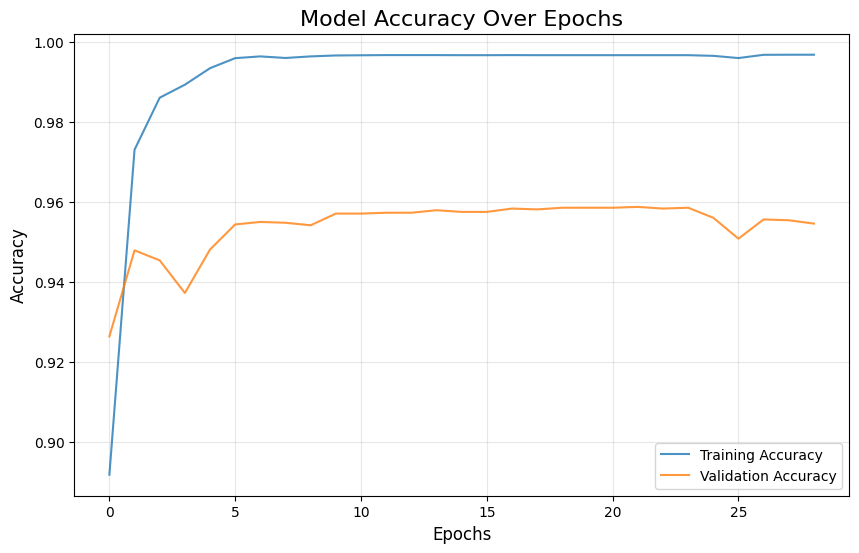

In [15]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(history['accuracy'], label='Training Accuracy', alpha=0.8)
plt.plot(history['val_accuracy'], label='Validation Accuracy', alpha=0.8)

# Add title, legend, and grid
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Display the plot
plt.show()

In [16]:
model.save('model.keras', overwrite=True)

## 📊 Prepare Your Submission

In [17]:
%%writefile model.py
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.
        
        The following is an example loading the weights of a pre-trained
        model.
        """
        self.model = tfk.models.load_model('model.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must not be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        preds = self.model.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=-1)
        return preds

Writing model.py


In [18]:
import zipfile
from datetime import datetime

# Define the filename for the submission zip file
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}_{name}.zip'

# Create a zip file and add the files
with zipfile.ZipFile(filename, 'w') as zipf:
    zipf.write('model.py')  # Add the Python script
    zipf.write('model.keras')  # Add the model file

print(f"Created submission file: {filename}")

Created submission file: submission_241121_222425_ConvNeXtBase.zip
